### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# dataframe summary #
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# size of dataset #
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [6]:
# Determine null (NaN) values for each colummn in dataset #
data.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

Determine distinct values for each column that contains NaN???

In [7]:
print(data['Bar'].value_counts())
print(data['RestaurantLessThan20'].value_counts())
print(data['CarryAway'].value_counts())
print(data['CoffeeHouse'].value_counts())
print(data['car'].value_counts())

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# Drop NaN from  Bar, RestaurantLessThan20, CarryAway, CoffeeHouse due to small subset contain NaN #
data.dropna(subset = ['Bar', 'RestaurantLessThan20', 'CarryAway','CoffeeHouse'], inplace=True)
# Replace NaN with NA for CAR column due to majority of values are NaN#
data = data.fillna('NA')

In [9]:
# size of dataset #
data.shape

(12205, 26)

In [10]:
# Check, if null (NaN) exist anymore (post replacement) in dataset #
data.isnull().sum().sort_values()

destination             0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
car                     0
income                  0
occupation              0
education               0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passanger               0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [11]:
print("{:.2f} % of total observations({:d}) chose to accept the coupon".format(data[data['Y'] == 1]['Y'].count() / data.shape[0] * 100, data.shape[0]))

56.88 % of total observations(12205) chose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

In [12]:
px.bar(data, x='coupon', labels={'coupon':'Coupon','count':'Number of Coupons'}, title='Coupon By Category', color='coupon', height=600)

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Frequency')

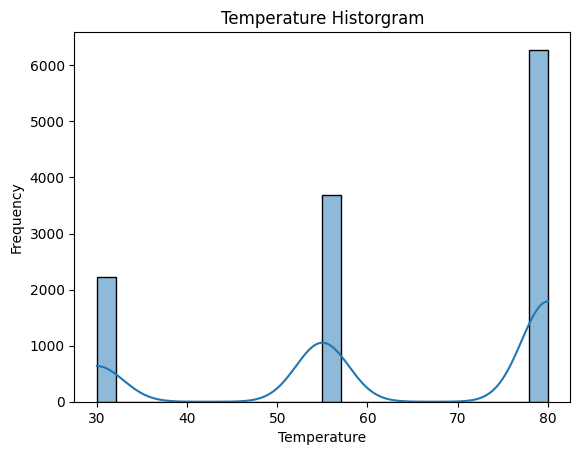

In [13]:
ax = sns.histplot(data=data,x='temperature',kde=True)
ax.set_title('Temperature Historgram')
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

Text(0.5, 1.0, 'Temperature Historgram by Coupon')

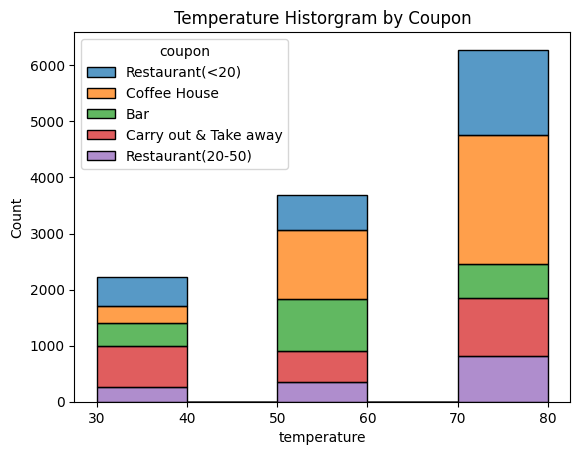

In [14]:
ax = sns.histplot(data=data,x='temperature',hue='coupon', bins=5, multiple="stack")
ax.set_title('Temperature Historgram by Coupon')

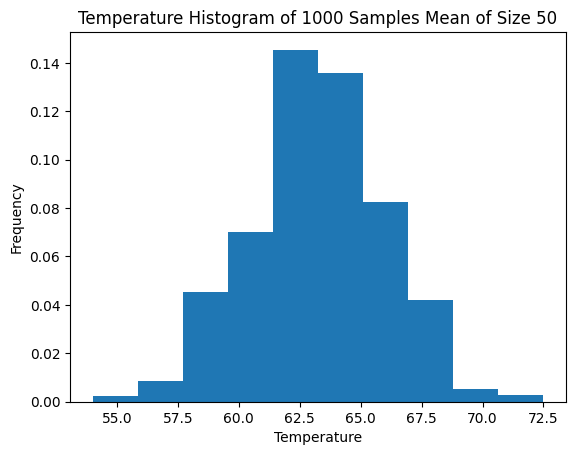

In [15]:
#empty list for sample means #
sample_means = []
for i in range(1000):
  sample_mean = np.mean(data['temperature'].sample(50))
  sample_means.append(sample_mean)

#histogram of sample means
plt.hist(sample_means,density=True)
plt.title('Temperature Histogram of 1000 Samples Mean of Size 50')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Determine mean and standard devivation of dataset Vs sample size and their difference #
actual_mean = np.mean(data['temperature'])
actual_std = np.std(data['temperature'])
sample_size_mean = np.mean(sample_means)
sample_size_std = np.std(sample_means)
print("Actual mean : {:.2f} , sample size Mean : {:.2f}, actual vs sample size mean difference : {:.2f}".format(actual_mean, sample_size_mean,abs(actual_mean - sample_size_mean)))
print("Actual Std : {:.2f} , sample size Std : {:.2f}, actual vs sample size Std difference : {:.2f}".format(actual_std, sample_size_std, abs(actual_std - sample_size_std)))

Actual mean : 63.29 , sample size Mean : 63.26, actual vs sample size mean difference : 0.03
Actual Std : 19.16 , sample size Std : 2.76, actual vs sample size Std difference : 16.40


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
bar_data = data[data['coupon'] == 'Bar']

In [18]:
bar_data.shape

(1937, 26)

2. What proportion of bar coupons were accepted?


In [19]:
print("{:.2f} % of bar coupons ({:d}) were accepted".format(bar_data[bar_data['Y'] == 1].shape[0] / bar_data.shape[0] * 100, bar_data.shape[0]))

40.94 % of bar coupons (1937) were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
# Group Acceptance by Category
bar_data_agg = bar_data.groupby('Bar')['Y'].agg('count').reset_index()
bar_data_accepted_coupon = bar_data[bar_data['Y'] == 1].groupby('Bar')['Y'].agg('count').reset_index()

In [21]:
# Bar acceptance rate calculation via group by technique #
bar_data_acceptance_rate_3_or_Less =  bar_data_accepted_coupon[bar_data_accepted_coupon['Bar'].isin(['never','less1','1~3'])]['Y'].sum() /  bar_data_agg[bar_data_agg['Bar'].isin(['never','less1','1~3'])]['Y'].sum() * 100
bar_data_acceptance_rate_more_than_3 = bar_data_accepted_coupon[bar_data_accepted_coupon['Bar'].isin(['4~8','gt8'])]['Y'].sum() /  bar_data_agg[bar_data_agg['Bar'].isin(['4~8','gt8'])]['Y'].sum() * 100
print("Bar coupons acceptance rate for those who went to a bar 3 or fewer time: {:.2f} %".format(bar_data_acceptance_rate_3_or_Less))
print("Bar coupons acceptance rate for those who went to a bar more than 3 times: {:.2f} %".format(bar_data_acceptance_rate_more_than_3))

Bar coupons acceptance rate for those who went to a bar 3 or fewer time: 37.04 %
Bar coupons acceptance rate for those who went to a bar more than 3 times: 76.17 %


In [22]:
# Bar acceptance rate calculation via traditional technique #
bar_3_or_Less = bar_data[bar_data['Bar'].isin(['never','less1','1~3'])]
bar_more_than_3 = bar_data[bar_data['Bar'].isin(['4~8','gt8'])]
bar_3_or_Less_acceptance_rate = bar_3_or_Less[bar_3_or_Less['Y'] == 1].shape[0] /  bar_3_or_Less.shape[0] * 100
bar_more_than_3_acceptance_rate = bar_more_than_3[bar_more_than_3['Y'] == 1].shape[0] /  bar_more_than_3.shape[0] * 100

print("Bar coupons acceptance rate for those who went to a bar 3 or fewer time: {:.2f} %".format(bar_3_or_Less_acceptance_rate))
print("Bar coupons acceptance rate for those who went to a bar more than 3 times: {:.2f} %".format(bar_more_than_3_acceptance_rate))

Bar coupons acceptance rate for those who went to a bar 3 or fewer time: 37.04 %
Bar coupons acceptance rate for those who went to a bar more than 3 times: 76.17 %


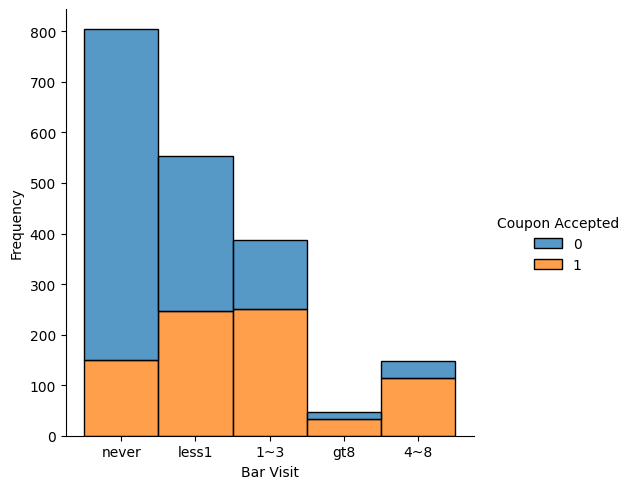

In [23]:
bar_data_rename_label = bar_data
ax = sns.displot(data=bar_data_rename_label.rename(columns = {"Y" : "Coupon Accepted"}), x="Bar",hue='Coupon Accepted', multiple='stack')
ax.set_titles('Bar Coupon Acceptance Weather Wise')
ax.set_axis_labels('Bar Visit','Frequency')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [24]:
# retrieve data who go to a bar more than once a month and are over the age of 25 #
bar_data_over_25 = bar_data[(~bar_data["age"].isin(['21','below21'])) & (bar_data['Bar'].isin(['1~3','4~8','gt8']))]
# retrieve all others data #
bar_data_all_others = bar_data[~bar_data.index.isin(bar_data_over_25.index)]

# calculate acceptance rate #
bar_data_acceptance_rate_over_25 = bar_data_over_25[bar_data_over_25['Y'] == 1].shape[0] /  bar_data_over_25.shape[0] * 100
bar_data_acceptance_rate_all_others = bar_data_all_others[bar_data_all_others['Y'] == 1].shape[0] /  bar_data_all_others.shape[0] * 100

# print outcome #
print("Bar coupons acceptance rate for those who go to a bar more than once a month and are over the age of 25: {:.2f} %".format(bar_data_acceptance_rate_over_25))
print("Bar coupons acceptance rate for all others: {:.2f} %".format(bar_data_acceptance_rate_all_others))
if(bar_data_acceptance_rate_over_25 > bar_data_acceptance_rate_all_others):
  print('Bar coupons acceptance rate is higher for those who go to a bar more than once a month and are over the age of 25')
elif(bar_data_acceptance_rate_all_others > bar_data_acceptance_rate_over_25):
  print('Bar coupons acceptance rate is higher for all others')
else:
  print('Bar coupons acceptance rate is same')

Bar coupons acceptance rate for those who go to a bar more than once a month and are over the age of 25: 69.29 %
Bar coupons acceptance rate for all others: 33.40 %
Bar coupons acceptance rate is higher for those who go to a bar more than once a month and are over the age of 25


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [25]:
# retrieve data who go to a bar more than once a month and are over the age of 25 #
bar_data_more_than_once = bar_data[(~bar_data['passanger'].isin(['Kid(s)'])) & (bar_data['Bar'].isin(['1~3','4~8','gt8'])) & ~(bar_data['occupation'].str.contains('farming|fishing|forestry', case=False, regex=True)) ]
# retrieve all others data #
bar_data_more_than_once_all_others = bar_data[~bar_data.index.isin(bar_data_more_than_once.index)]

# calculate acceptance rate #
bar_data_acceptance_rate = bar_data_more_than_once[bar_data_more_than_once['Y'] == 1].shape[0] /  bar_data_more_than_once.shape[0] * 100
bar_data_acceptance_rate_all_others = bar_data_more_than_once_all_others[bar_data_more_than_once_all_others['Y'] == 1].shape[0] /  bar_data_more_than_once_all_others.shape[0] * 100

# print outcome #
print("Bar coupons acceptance rate for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {:.2f} %".format(bar_data_acceptance_rate))
print("Bar coupons acceptance rate for all others: {:.2f} %".format(bar_data_acceptance_rate_all_others))
if(bar_data_acceptance_rate > bar_data_acceptance_rate_all_others):
  print('Bar coupons acceptance rate is higher for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry')
elif(bar_data_acceptance_rate_all_others > bar_data_acceptance_rate):
  print('Bar coupons acceptance rate is higher for all others')
else:
  print('Bar coupons acceptance rate is same')

Bar coupons acceptance rate for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 70.82 %
Bar coupons acceptance rate for all others: 29.45 %
Bar coupons acceptance rate is higher for those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [26]:
#print(bar_data.maritalStatus.value_counts())
#print(bar_data.age.value_counts())
#print(bar_data.RestaurantLessThan20.value_counts())
#bar_data.income.value_counts()

In [27]:
 # accetance rate marital status #
 bar_data_marital_status = bar_data[(bar_data['Bar'].isin(['1~3','4~8','gt8'])) & (~bar_data['passanger'].isin(['Kid(s)'])) & (~bar_data['maritalStatus'].isin(['Widowed']))]
 bar_data_marital_status_acceptance_rate = bar_data_marital_status[bar_data_marital_status['Y'] == 1].shape[0] / bar_data_marital_status.shape[0] * 100
 bar_data_marital_status_acceptance_rate

  # accetance rate age under 30 #
 bar_data_age_under_30 = bar_data[(bar_data['Bar'].isin(['1~3','4~8','gt8'])) & (bar_data["age"].isin(['below21','21','26']))]
 bar_data_age_under_30_acceptance_rate = bar_data_age_under_30[bar_data_age_under_30['Y'] == 1].shape[0] / bar_data_age_under_30.shape[0] * 100
 bar_data_age_under_30_acceptance_rate

  # accetance rate income less than 30 #
 bar_data_income_under_50 = bar_data[(bar_data['RestaurantLessThan20'].isin(['4~8','gt8'])) & (bar_data['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))]
 bar_data_income_under_50_acceptance_rate = bar_data_income_under_50[bar_data_income_under_50['Y'] == 1].shape[0] / bar_data_income_under_50.shape[0] * 100
 bar_data_income_under_50_acceptance_rate

print("Bar coupons acceptance rate for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {:.2f} %".format(bar_data_marital_status_acceptance_rate))
print("Bar coupons acceptance rate for those who go to bars more than once a month and are under the age of 30: {:.2f} %".format(bar_data_age_under_30_acceptance_rate))
print("Bar coupons acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K: {:.2f} %".format(bar_data_income_under_50_acceptance_rate))

Bar coupons acceptance rate for those who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 70.82 %
Bar coupons acceptance rate for those who go to bars more than once a month and are under the age of 30: 71.73 %
Bar coupons acceptance rate for those who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.65 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [28]:
print('Bar coupons acceptance rate is highest for those who go to bars more than once a month and under the age of 30')

Bar coupons acceptance rate is highest for those who go to bars more than once a month and under the age of 30


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [29]:
coffee_house_data = data[data['coupon'] == 'Coffee House']

In [30]:
coffee_house_data.shape

(3843, 26)

2. Coffee House Coupon Distribution and Acceptance by Age Group

In [31]:
px.histogram(data_frame=coffee_house_data, x="age", color="Y", text_auto=True, labels={'age':'Age Group', 'count':'Count'}, title=' Coffe House Coupon Distribution By Age Group Histogram')

3. What proportion of bar coupons were accepted?

In [32]:
print("{:.2f} % of cofee house coupons ({:d}) were accepted".format(coffee_house_data[coffee_house_data['Y'] == 1].shape[0] / coffee_house_data.shape[0] * 100, coffee_house_data.shape[0]))

49.70 % of cofee house coupons (3843) were accepted


4. Compare the acceptance rate between those who went to a CoffeeHouse 3 or fewer times a month to those who went more.

In [33]:
# group by Category #
coffee_house_data_agg = coffee_house_data.groupby('CoffeeHouse')['Y'].agg('count').reset_index()
coffee_house_data_accepted_coupon = coffee_house_data[coffee_house_data['Y'] == 1].groupby('CoffeeHouse')['Y'].agg('count').reset_index()

# acceptance rate calculation #
coffee_house_data_acceptance_rate_3_or_Less =  coffee_house_data_accepted_coupon[coffee_house_data_accepted_coupon['CoffeeHouse'].isin(['never','less1','1~3'])]['Y'].sum() /  coffee_house_data_agg[coffee_house_data_agg['CoffeeHouse'].isin(['never','less1','1~3'])]['Y'].sum() * 100
bar_data_acceptance_rate_more_than_3 = coffee_house_data_accepted_coupon[coffee_house_data_accepted_coupon['CoffeeHouse'].isin(['4~8','gt8'])]['Y'].sum() /  coffee_house_data_agg[coffee_house_data_agg['CoffeeHouse'].isin(['4~8','gt8'])]['Y'].sum() * 100
print("CoffeeHouse coupons acceptance rate for those who went to a CoffeeHouse 3 or fewer time: {:.2f} %".format(coffee_house_data_acceptance_rate_3_or_Less))
print("CoffeeHouse coupons acceptance rate for those who went to a CoffeeHouse more than 3 times: {:.2f} %".format(bar_data_acceptance_rate_more_than_3))

CoffeeHouse coupons acceptance rate for those who went to a CoffeeHouse 3 or fewer time: 44.60 %
CoffeeHouse coupons acceptance rate for those who went to a CoffeeHouse more than 3 times: 67.40 %


5. Compare the acceptance rate between drivers who go to a CoffeeHouse more than once a month and under the age of 30 to the all others.

In [34]:
# Go more than once a month and under the age of 30 #
coffee_house_data_under_30 = coffee_house_data[(coffee_house_data['CoffeeHouse'].isin(['1~3','4~8','gt8'])) & (coffee_house_data["age"].isin(['below21','21','26']))]
# retrieve all others data #
coffee_house_data_all_others = coffee_house_data[~coffee_house_data.index.isin(coffee_house_data_under_30.index)]

# calculate acceptance rate #
coffee_house_data_acceptance_rate_under_30 = coffee_house_data_under_30[coffee_house_data_under_30['Y'] == 1].shape[0] /  coffee_house_data_under_30.shape[0] * 100
coffee_house_data_acceptance_rate_all_others = coffee_house_data_all_others[coffee_house_data_all_others['Y'] == 1].shape[0] /  coffee_house_data_all_others.shape[0] * 100

# print outcome #
print("CoffeeHouse coupons acceptance rate for those who go to a CoffeeHouse more than once a month and under the age of 30: {:.2f} %".format(coffee_house_data_acceptance_rate_under_30))
print("CoffeeHouse coupons acceptance rate for all others: {:.2f} %".format(coffee_house_data_acceptance_rate_all_others))

CoffeeHouse coupons acceptance rate for those who go to a CoffeeHouse more than once a month and under the age of 30: 68.63 %
CoffeeHouse coupons acceptance rate for all others: 43.46 %


6. Compare the acceptance rate between drivers who go to CoffeeHouse more than once a month and had NO passengers to the all others.

In [35]:
# Go ALONE more than once a month #
coffee_house_data_more_than_once = coffee_house_data[(coffee_house_data['CoffeeHouse'].isin(['1~3','4~8','gt8'])) & (coffee_house_data["passanger"].isin(['Alone']))]
# retrieve all others data #
coffee_house_data_more_than_once_all_others = coffee_house_data[~coffee_house_data.index.isin(coffee_house_data_more_than_once.index)]

# calculate acceptance rate #
coffee_house_data_more_than_once_acceptance_rate = coffee_house_data_more_than_once[coffee_house_data_more_than_once['Y'] == 1].shape[0] /  coffee_house_data_more_than_once.shape[0] * 100
coffee_house_data_more_than_once_all_others_acceptance_rate = coffee_house_data_more_than_once_all_others[coffee_house_data_more_than_once_all_others['Y'] == 1].shape[0] /  coffee_house_data_more_than_once_all_others.shape[0] * 100

# print outcome #
print("CoffeeHouse coupons acceptance rate for those who go to a CoffeeHouse more than once a month Alone: {:.2f} %".format(coffee_house_data_more_than_once_acceptance_rate))
print("CoffeeHouse coupons acceptance rate for all others: {:.2f} %".format(coffee_house_data_more_than_once_all_others_acceptance_rate))

CoffeeHouse coupons acceptance rate for those who go to a CoffeeHouse more than once a month Alone: 59.04 %
CoffeeHouse coupons acceptance rate for all others: 46.11 %


7. Compare the acceptance rate between drivers who go to CoffeeHouse more than once a month with Friends or Partner to the all others.

In [36]:
# Go ALONE more than once a month #
coffee_house_data_passanger_more_than_once = coffee_house_data[(coffee_house_data['CoffeeHouse'].isin(['1~3','4~8','gt8'])) & (coffee_house_data["passanger"].isin(['Friend(s)','Partner']))]
# retrieve all others data #
coffee_house_data_passanger_more_than_once_all_others = coffee_house_data[~coffee_house_data.index.isin(coffee_house_data_passanger_more_than_once.index)]

# calculate acceptance rate #
coffee_house_data_passanger_more_than_once_acceptance_rate = coffee_house_data_passanger_more_than_once[coffee_house_data_passanger_more_than_once['Y'] == 1].shape[0] /  coffee_house_data_passanger_more_than_once.shape[0] * 100
coffee_house_data_passanger_more_than_once_all_others_acceptance_rate = coffee_house_data_passanger_more_than_once_all_others[coffee_house_data_passanger_more_than_once_all_others['Y'] == 1].shape[0] /  coffee_house_data_passanger_more_than_once_all_others.shape[0] * 100

# print outcome #
print("CoffeeHouse coupons acceptance rate for those who go to a CoffeeHouse more than once a month Alone with Friends or Partner : {:.2f} %".format(coffee_house_data_passanger_more_than_once_acceptance_rate))
print("CoffeeHouse coupons acceptance rate for all others: {:.2f} %".format(coffee_house_data_passanger_more_than_once_all_others_acceptance_rate))

CoffeeHouse coupons acceptance rate for those who go to a CoffeeHouse more than once a month Alone with Friends or Partner : 76.63 %
CoffeeHouse coupons acceptance rate for all others: 43.64 %


8.  Based on these observations, what do you hypothesize about drivers who accepted the CoffeeHouse coupons?

In [37]:
print('CoffeeHouse coupons acceptance rate is higher among those who go to CoffeeHouse more than once a month and either under the age of 30 or accompany with partner or friend')

CoffeeHouse coupons acceptance rate is higher among those who go to CoffeeHouse more than once a month and either under the age of 30 or accompany with partner or friend
